# Mnist Dataset Open Ended Lab

**Artificial neural Network(ANN)**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# Load dataset
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')
train_data

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [5]:
test_data

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [6]:
# Separate features and labels
y_train = train_data['label'].values
X_train = train_data.drop(columns=['label']).values.astype('float32')
y_test = test_data['label'].values
X_test = test_data.drop(columns=['label']).values.astype('float32')

In [7]:
# Normalize pixel values to range [0,1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
# One-hot encode labels
y_train_ohe = to_categorical(y_train, num_classes=10)
y_test_ohe = to_categorical(y_test, num_classes=10)

In [9]:
# Define ANN model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),  # Increased neurons
    Dropout(0.3),  # Slightly increased dropout
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

C:\Users\munta\tensorflow_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Train the model
history = model.fit(X_train, y_train_ohe, epochs=20, batch_size=128,  # Increased batch size
                    validation_data=(X_test, y_test_ohe),
                    callbacks=[early_stopping], verbose=2)

Epoch 1/20
469/469 - 9s - 20ms/step - accuracy: 0.8767 - loss: 0.3992 - val_accuracy: 0.9553 - val_loss: 0.1433
Epoch 2/20
469/469 - 4s - 8ms/step - accuracy: 0.9515 - loss: 0.1608 - val_accuracy: 0.9687 - val_loss: 0.1012
Epoch 3/20
469/469 - 4s - 8ms/step - accuracy: 0.9633 - loss: 0.1236 - val_accuracy: 0.9731 - val_loss: 0.0875
Epoch 4/20
469/469 - 4s - 8ms/step - accuracy: 0.9689 - loss: 0.1014 - val_accuracy: 0.9775 - val_loss: 0.0786
Epoch 5/20
469/469 - 4s - 8ms/step - accuracy: 0.9721 - loss: 0.0919 - val_accuracy: 0.9760 - val_loss: 0.0774
Epoch 6/20
469/469 - 4s - 8ms/step - accuracy: 0.9753 - loss: 0.0790 - val_accuracy: 0.9776 - val_loss: 0.0751
Epoch 7/20
469/469 - 4s - 8ms/step - accuracy: 0.9778 - loss: 0.0713 - val_accuracy: 0.9814 - val_loss: 0.0663
Epoch 8/20
469/469 - 4s - 8ms/step - accuracy: 0.9792 - loss: 0.0657 - val_accuracy: 0.9818 - val_loss: 0.0624
Epoch 9/20
469/469 - 4s - 8ms/step - accuracy: 0.9813 - loss: 0.0594 - val_accuracy: 0.9804 - val_loss: 0.0667


In [12]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_ohe)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9778 - loss: 0.0713
Test Accuracy: 98.18%


In [13]:
# Predict labels
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [14]:
print("First 15 Predicted Labels:", y_pred_labels[:15])
print("First 15 Actual Labels:   ", y_test[:15])

First 15 Predicted Labels: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1]
First 15 Actual Labels:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1]


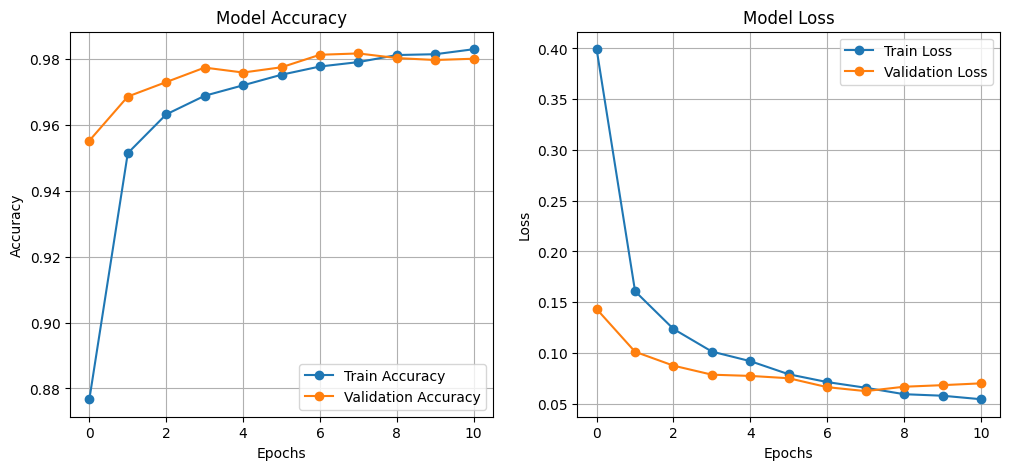

In [15]:
# Plot Training & Validation Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)

plt.show()

In [16]:
# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred_labels))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



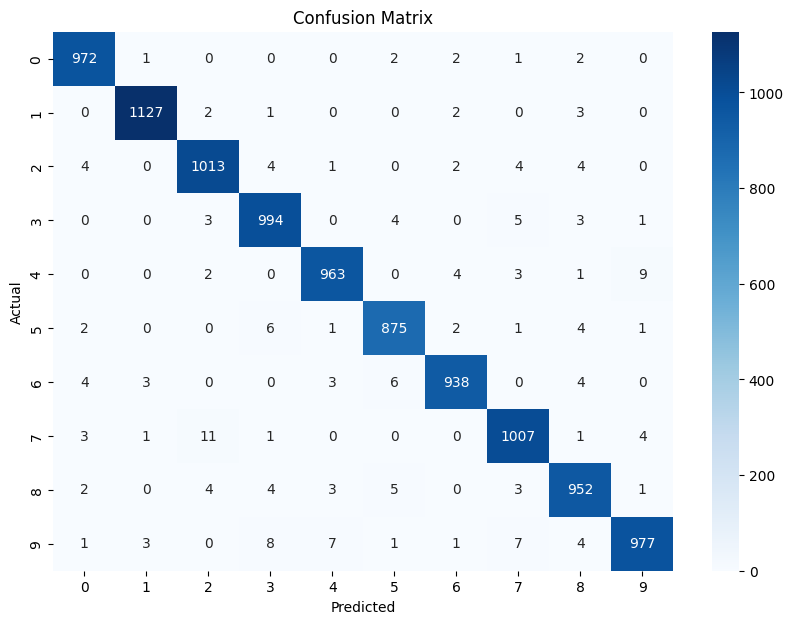

In [17]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**K-Nearest Neighbors (KNN)**

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [20]:
# Initialize KNN model with k=5 (you can tune this value)
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean')

In [21]:
# Train the KNN model
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', weights='distance')

In [22]:
# Predict on test data
y_knn_pred = knn.predict(X_test)

In [23]:
print("First 15 Predicted Labels:", y_knn_pred[:15])
print("First 15 Actual Labels:   ", y_test[:15])

First 15 Predicted Labels: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1]
First 15 Actual Labels:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1]


In [24]:
# Calculate accuracy
knn_accuracy = accuracy_score(y_test, y_knn_pred)
print(f'KNN Test Accuracy: {knn_accuracy * 100:.2f}%')

KNN Test Accuracy: 96.91%


In [25]:
# Classification Report
print("\nClassification Report for KNN:\n", classification_report(y_test, y_knn_pred))


Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.96      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.98      0.94      0.96       974
           9       0.95      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



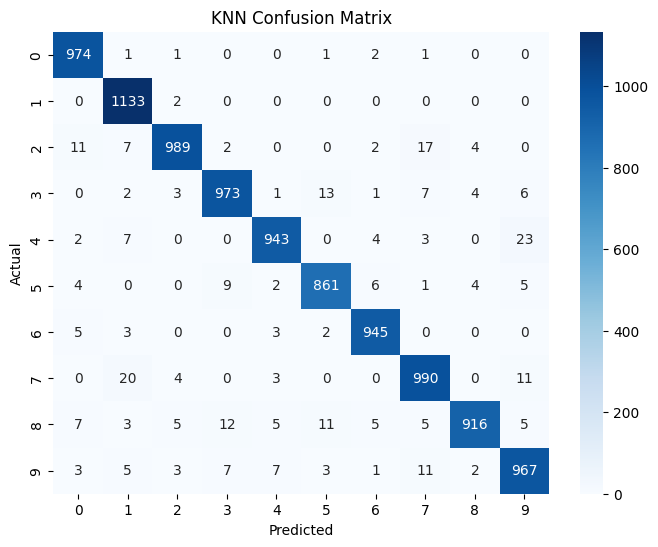

In [26]:
# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_knn_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()

**Random Forest (RF)**

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [30]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
# Predict on test data
y_rf_pred = rf_model.predict(X_test)

In [32]:
# Calculate accuracy
rf_accuracy = accuracy_score(y_test, y_rf_pred)
print(f'Random Forest Test Accuracy: {rf_accuracy * 100:.2f}%')

Random Forest Test Accuracy: 97.04%


In [33]:
print("First 15 Predicted Labels:", y_rf_pred[:15])
print("First 15 Actual Labels:   ", y_test[:15])

First 15 Predicted Labels: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1]
First 15 Actual Labels:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1]


In [34]:
# Generate classification report
print("\nClassification Report for Random Forest:\n", classification_report(y_test, y_rf_pred))


Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



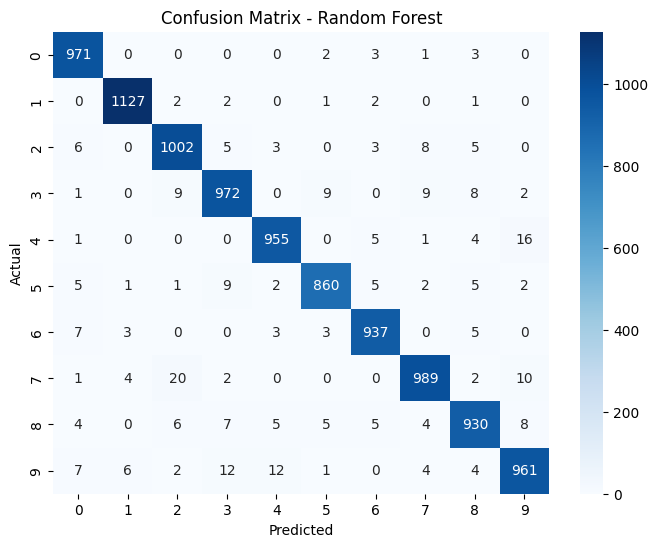

In [35]:
# Confusion matrix
rf_conf_matrix = confusion_matrix(y_test, y_rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

**Support Vector Machine (SVM)**

In [37]:
from sklearn.svm import SVC

In [38]:
# Initialize the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

In [39]:
# Train the model
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [40]:
# Predict on test data
y_svm_pred = svm_model.predict(X_test)

In [41]:
# Calculate accuracy
svm_accuracy = accuracy_score(y_test, y_svm_pred)
print(f'SVM Test Accuracy: {svm_accuracy * 100:.2f}%')

SVM Test Accuracy: 97.92%


In [42]:
print("First 15 Predicted Labels:", y_svm_pred[:15])
print("First 15 Actual Labels:   ", y_test[:15])

First 15 Predicted Labels: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1]
First 15 Actual Labels:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1]


In [43]:
# Generate classification report
print("\nClassification Report for SVM:\n", classification_report(y_test, y_svm_pred))


Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



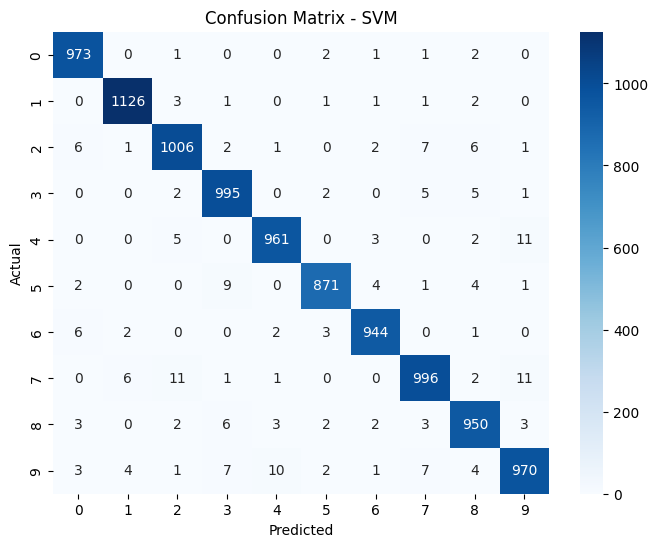

In [44]:
# Confusion matrix
svm_conf_matrix = confusion_matrix(y_test, y_svm_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

In [45]:
# Generate classification reports for all models
ann_report = classification_report(y_test, y_pred_labels, output_dict=True)   # ANN Model
knn_report = classification_report(y_test, y_knn_pred, output_dict=True)       # KNN Model
rf_report = classification_report(y_test, y_rf_pred, output_dict=True)         # Random Forest Model
svm_report = classification_report(y_test, y_svm_pred, output_dict=True)       # SVM Model

# Extract key metrics
report_df = pd.DataFrame({
    "Metric": ["Accuracy", "Macro Avg Precision", "Macro Avg Recall", "Macro Avg F1-score"],
    "ANN": [ann_report["accuracy"], ann_report["macro avg"]["precision"], ann_report["macro avg"]["recall"], ann_report["macro avg"]["f1-score"]],
    "KNN": [knn_report["accuracy"], knn_report["macro avg"]["precision"], knn_report["macro avg"]["recall"], knn_report["macro avg"]["f1-score"]],
    "Random Forest": [rf_report["accuracy"], rf_report["macro avg"]["precision"], rf_report["macro avg"]["recall"], rf_report["macro avg"]["f1-score"]],
    "SVM": [svm_report["accuracy"], svm_report["macro avg"]["precision"], svm_report["macro avg"]["recall"], svm_report["macro avg"]["f1-score"]]
})

# Display results
print("\nComparison of Classification Reports:")
print(report_df)


Comparison of Classification Reports:
                Metric       ANN       KNN  Random Forest       SVM
0             Accuracy  0.981800  0.969100       0.970400  0.979200
1  Macro Avg Precision  0.981679  0.969487       0.970268  0.979197
2     Macro Avg Recall  0.981652  0.968764       0.970110  0.979092
3   Macro Avg F1-score  0.981653  0.968990       0.970163  0.979130


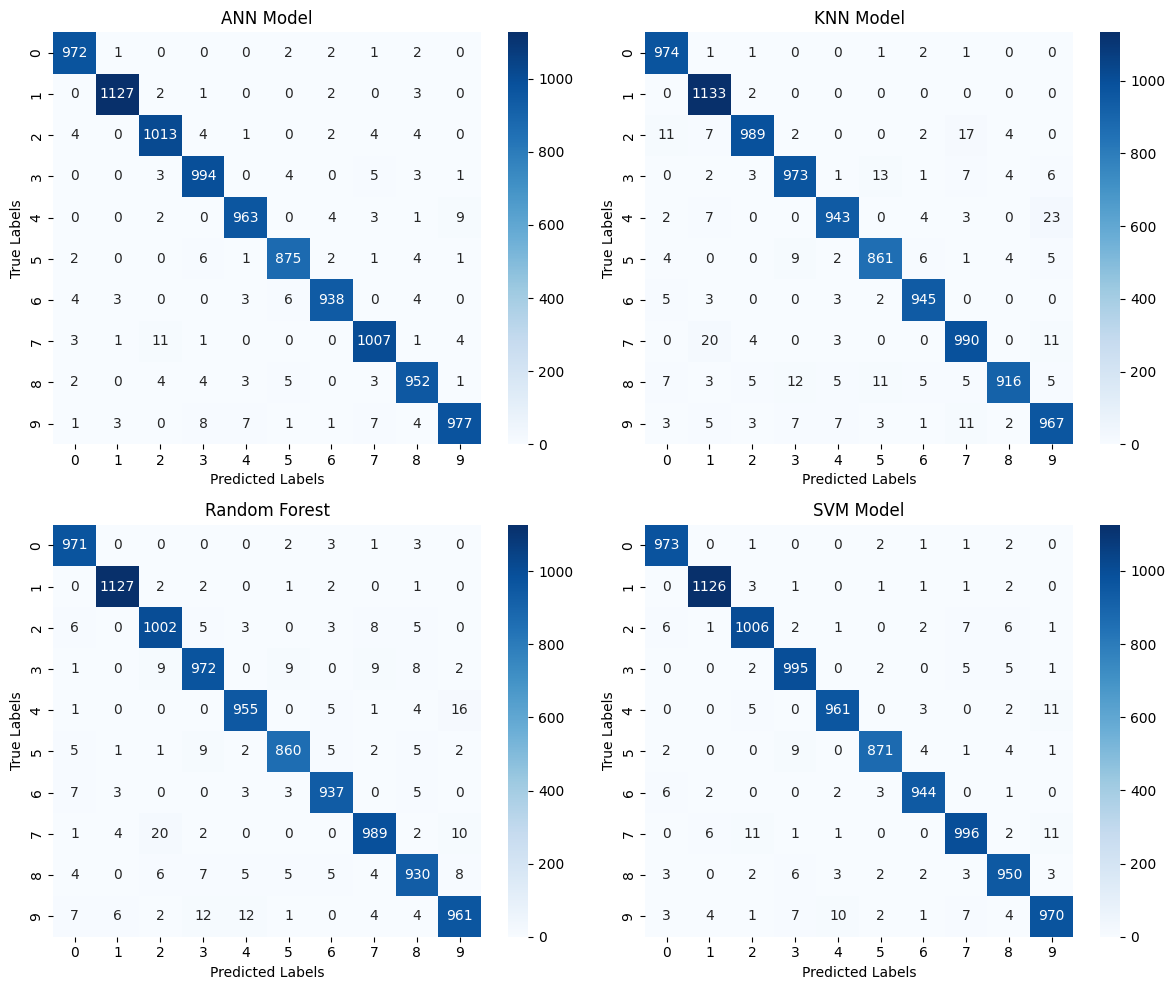

In [47]:
# Generate confusion matrices for each model
cm_ann = confusion_matrix(y_test, y_pred_labels)   # ANN Model
cm_knn = confusion_matrix(y_test, y_knn_pred)      # KNN Model
cm_rf = confusion_matrix(y_test, y_rf_pred)        # Random Forest Model
cm_svm = confusion_matrix(y_test, y_svm_pred)      # SVM Model

# Define figure size and layout
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# List of models and their confusion matrices
cms = [(cm_ann, "ANN Model"), (cm_knn, "KNN Model"), (cm_rf, "Random Forest"), (cm_svm, "SVM Model")]
ax_idx = [(0, 0), (0, 1), (1, 0), (1, 1)]  # Subplot positions

# Plot confusion matrices
for idx, (cm, title) in enumerate(cms):
    ax = axes[ax_idx[idx]]
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10), ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

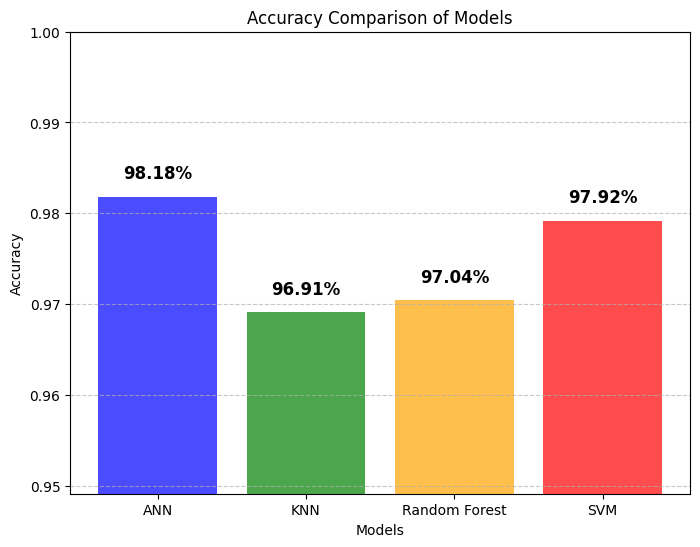

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already calculated accuracy for each model
accuracy_scores = {
    "ANN": accuracy,  # Replace with actual accuracy variable
    "KNN": knn_accuracy,
    "Random Forest": rf_accuracy,
    "SVM": svm_accuracy
}

# Extract model names and accuracies
models = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())

# Plot histogram
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'], alpha=0.7)

# Adding labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Models")
plt.ylim(min(accuracies) - 0.02, 1.0)  # Adjust y-axis range dynamically
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Displaying values on bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.002, f"{v:.2%}", ha='center', fontsize=12, fontweight='bold')

# Show the plot
plt.show()

**Conclusion**

The **Artificial Neural Network (ANN)** model achieved the highest accuracy of **98.18%**, making it the best performer in this classification task. The **Support Vector Machine (SVM)** model followed closely with an accuracy of **97.92%**, demonstrating strong performance in handling complex decision boundaries. The **Random Forest model** achieved an accuracy of **97.04%**, showing good generalization but slightly lower accuracy than SVM. Lastly, the **K-Nearest Neighbors (KNN)** model had the lowest accuracy of **96.91%**, indicating that it may struggle with high-dimensional data compared to other models. Overall, **ANN was the most effective, followed by SVM, Random Forest, and KNN**.